# Perform Exploratory Data Analysis (EDA) on the data AMEO-2015

##  Aspiring_minds_employability_outcomes_2015

- The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset contains around 40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.

## 1. Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
pd.set_option('display.max_columns', 40)
df = pd.read_excel('AMEO_2015.xlsx')

In [3]:
df.head()


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


## 2. Data Understanding



In [4]:
df.shape

(3998, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

### Drop the unnecessary column from the dataset


In [7]:
data=df.drop(['Unnamed: 0', 'ID','CollegeID','CollegeCityID'], axis=1)


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3998.0,663794.540520,363218.245829,11244.0000,334284.250000,639600.000000,990480.000000,1.298275e+06
Salary,3998.0,307699.849925,212737.499957,35000.0000,180000.000000,300000.000000,370000.000000,4.000000e+06
10percentage,3998.0,77.925443,9.850162,43.0000,71.680000,79.150000,85.670000,9.776000e+01
12graduation,3998.0,2008.087544,1.653599,1995.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,3998.0,74.466366,10.999933,40.0000,66.000000,74.400000,82.600000,9.870000e+01
CollegeID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeTier,3998.0,1.925713,0.262270,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,3998.0,71.486171,8.167338,6.4500,66.407500,71.720000,76.327500,9.993000e+01
CollegeCityID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeCityTier,3998.0,0.300400,0.458489,0.0000,0.000000,0.000000,1.000000,1.000000e+00


In [9]:
df.duplicated().sum()

0

In [10]:
data.shape

(3998, 35)

## 3. Data Pre-processing

In [11]:
data.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [12]:
data.JobCity.value_counts()

Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

In [13]:
data['JobCity'] = data['JobCity'].str.replace('-1','Unknown')

In [14]:
data.DOL.head(10)

0                present
1                present
2                present
3                present
4    2015-03-01 00:00:00
5                present
6    2015-05-01 00:00:00
7    2015-07-01 00:00:00
8                present
9                present
Name: DOL, dtype: object

In [15]:
data['DOL'] = data['DOL'].astype(str)
data['DOL'] = data['DOL'].str.replace('present','2015-12-31 00:00:00')

In [16]:
data.DOJ.head(10)

0   2012-06-01
1   2013-09-01
2   2014-06-01
3   2011-07-01
4   2014-03-01
5   2014-06-01
6   2014-08-01
7   2014-07-01
8   2013-07-01
9   2014-07-01
Name: DOJ, dtype: datetime64[ns]

In [17]:
data.DOL.head(10)

0    2015-12-31 00:00:00
1    2015-12-31 00:00:00
2    2015-12-31 00:00:00
3    2015-12-31 00:00:00
4    2015-03-01 00:00:00
5    2015-12-31 00:00:00
6    2015-05-01 00:00:00
7    2015-07-01 00:00:00
8    2015-12-31 00:00:00
9    2015-12-31 00:00:00
Name: DOL, dtype: object

In [18]:
data['DOL'] = pd.to_datetime(data['DOL'])
data['Experience'] = data['DOL'] - data['DOJ']

In [19]:
data['Age'] = data['DOL'] - data['DOB']
data['Age'] = data['Age'].astype(str)

In [20]:
data['Experience'] = ((data['DOL'] - data['DOJ']).map(lambda x: round(x.days/365)))

In [21]:
data.Experience.unique()


array([ 4,  2,  5,  1,  3,  0, -1,  6, 10, 25,  9], dtype=int64)

In [22]:
data['Experience'] = data['Experience'].replace(-1,0)

In [23]:
data.Age

0       9446 days
1       9584 days
2       8550 days
3       9522 days
4       8768 days
          ...    
3993    9301 days
3994    7613 days
3995    8947 days
3996    8322 days
3997    9074 days
Name: Age, Length: 3998, dtype: object

In [24]:
data['Age'] = ((data['DOL'] - data['DOB']).map(lambda x: round(x.days/365)))

In [25]:

data.Age.unique()

array([26, 23, 24, 22, 25, 27, 21, 29, 35, 28, 18, 20, 19, 30, 31, 33, 32],
      dtype=int64)

In [26]:
data['Age'] = data['Age'].astype(int)
data['Experience'] = data['Experience'].astype(int)

# 4. Data Analysis and Visualization

### Uni-Variate Analysis

In [27]:
data.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Experience', 'Age'],
      dtype='object')

#### Detecting Outliers for Numerical Columns

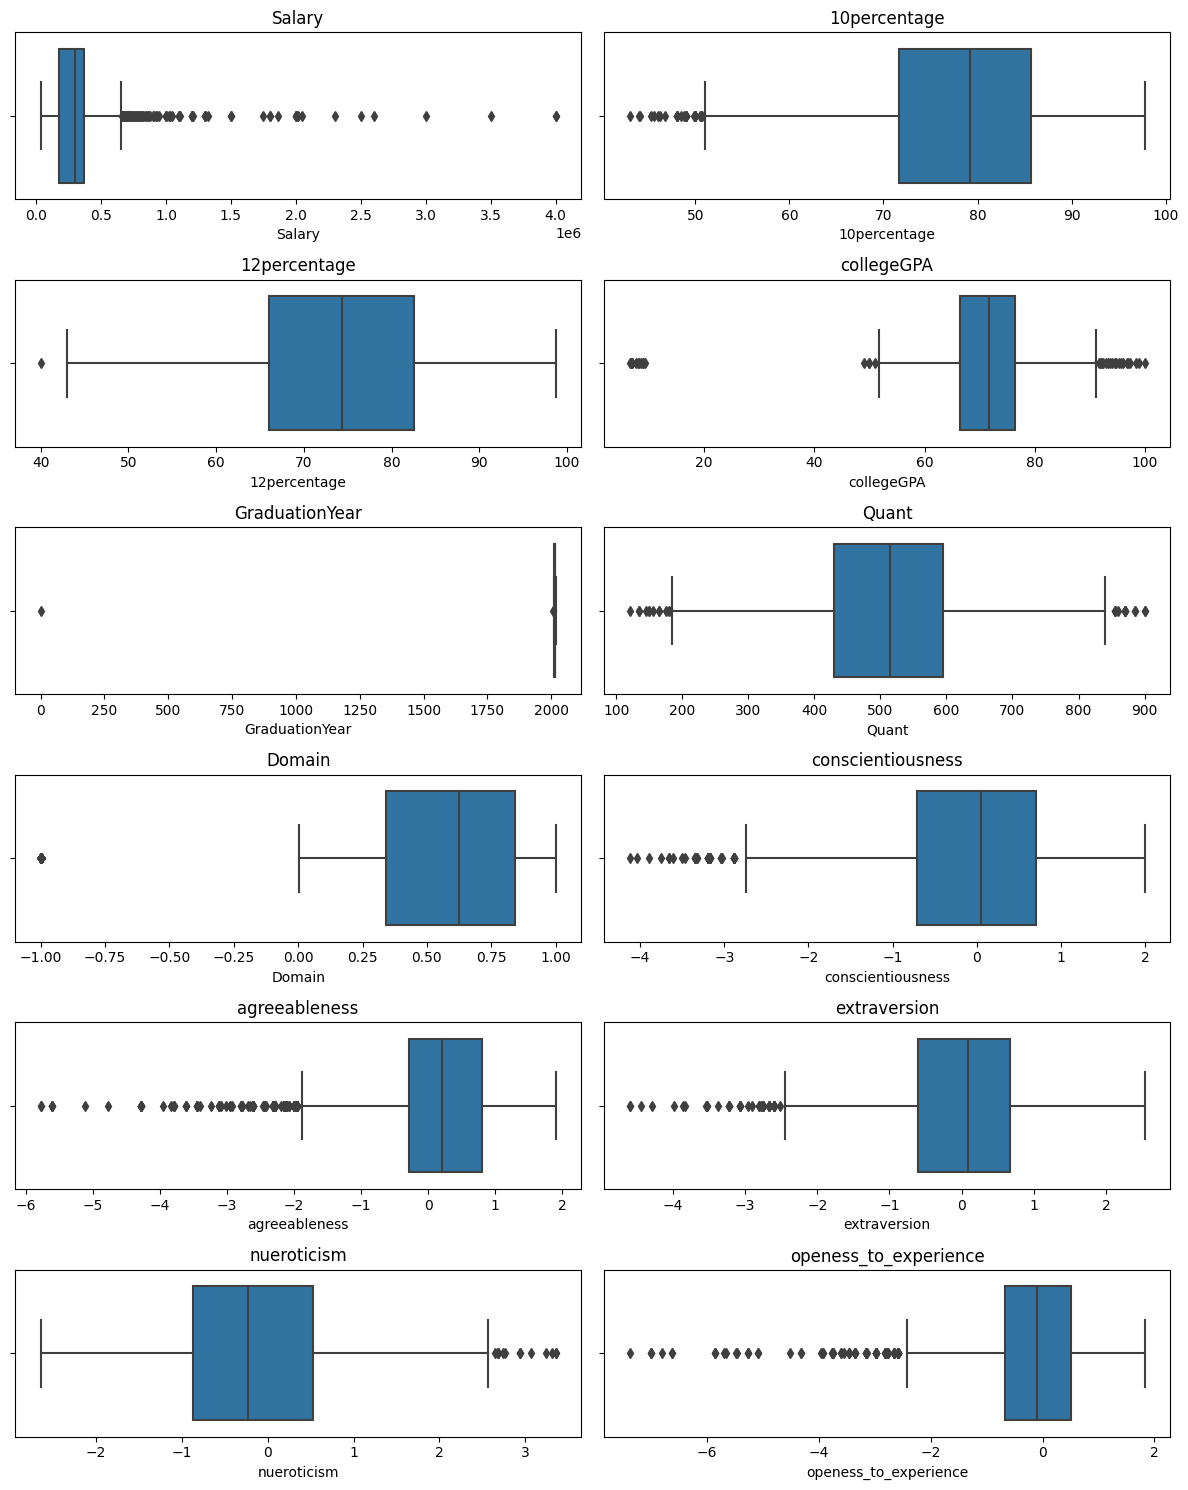

In [28]:
num_cols = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'GraduationYear', 'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,15))
for col, ax in zip(num_cols, axes.flatten()):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()

### Observation :

- The above boxplots can see most of the numerical columns are indicates that has too many outliers

### Histogram Plot For Numerical Columns

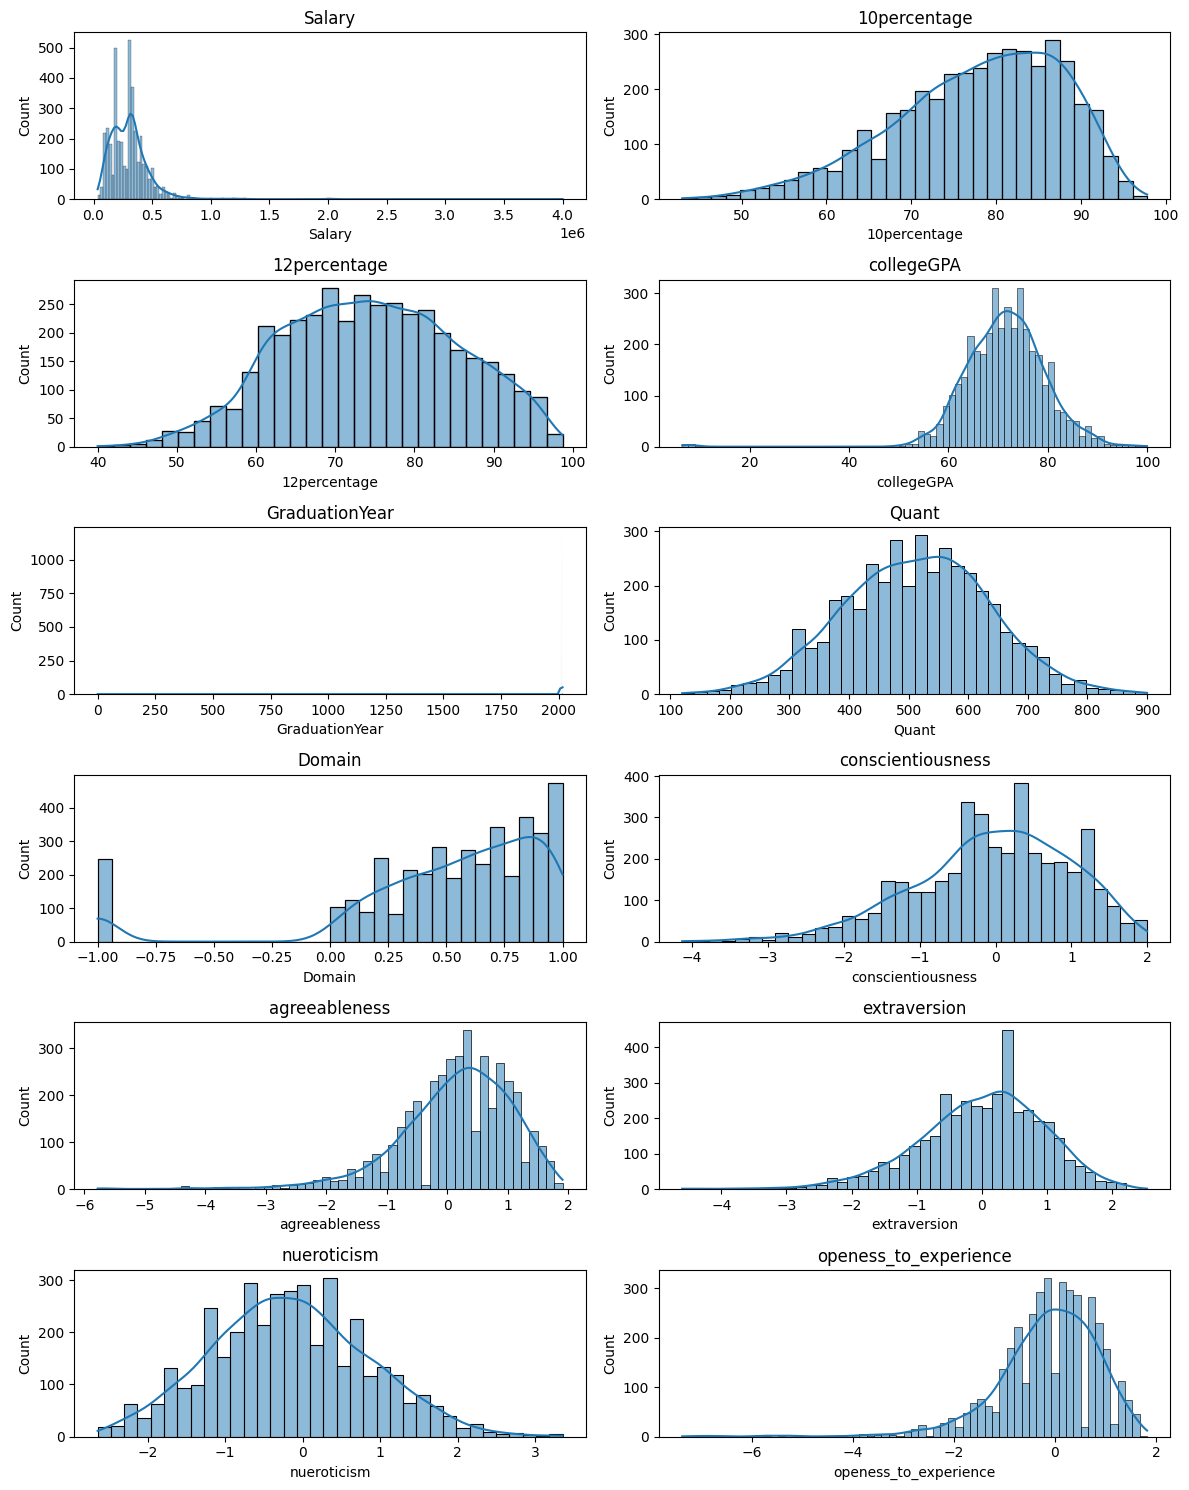

In [29]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,15))
for col, ax in zip(num_cols, axes.flatten()):
    sns.histplot(x=df[col], ax=ax, kde=True)
    ax.set_title(col)
plt.tight_layout()


### Observation :
- We can see that most of the numerical columns are normally distributed. But, some columns like GraduationYear, Domain, agreeableness and openees_to_experience are not normally distributed.

## Bivariate Analysis

### 10percentage Vs Salary

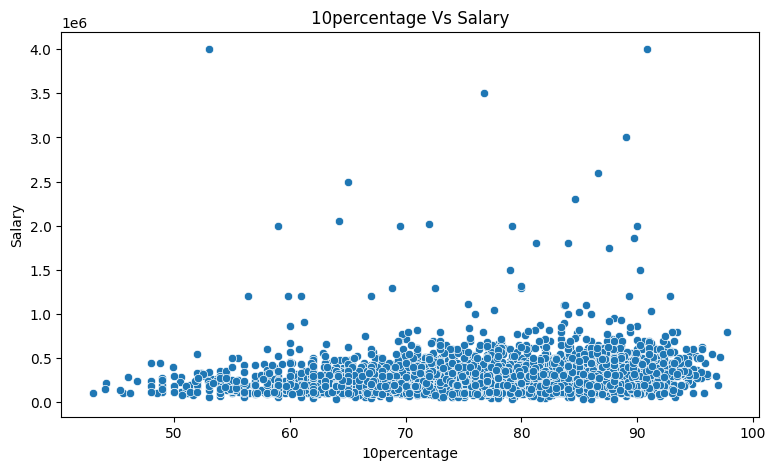

In [30]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='10percentage', y='Salary', data=data)
plt.title('10percentage Vs Salary')
plt.show()

### 12percentage Vs Salary

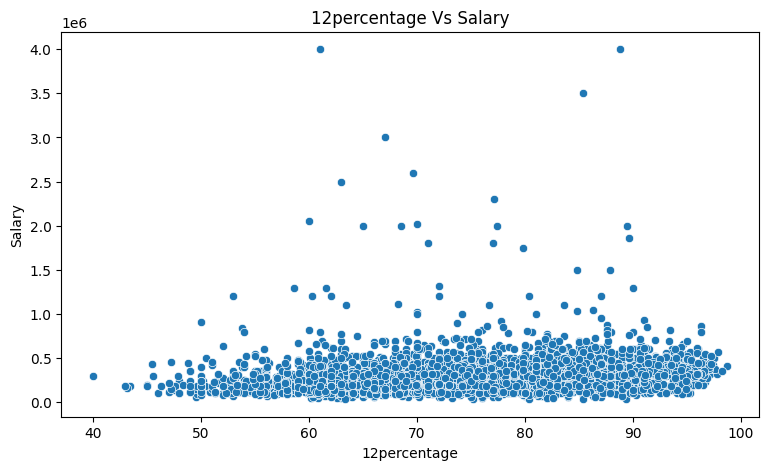

In [31]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='12percentage', y='Salary', data=data)
plt.title('12percentage Vs Salary')
plt.show()

### Experience vs Salary

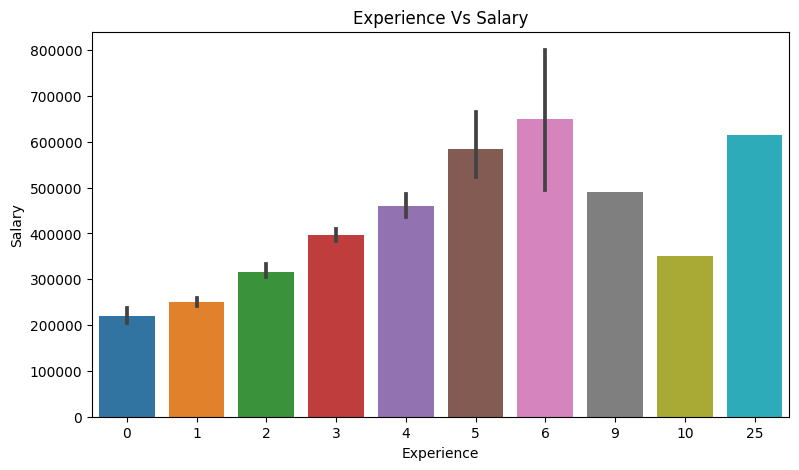

In [32]:
plt.figure(figsize=(9,5))
plt.title('Experience Vs Salary')
sns.barplot(x='Experience',y='Salary',data=data);

### Age vs Salary

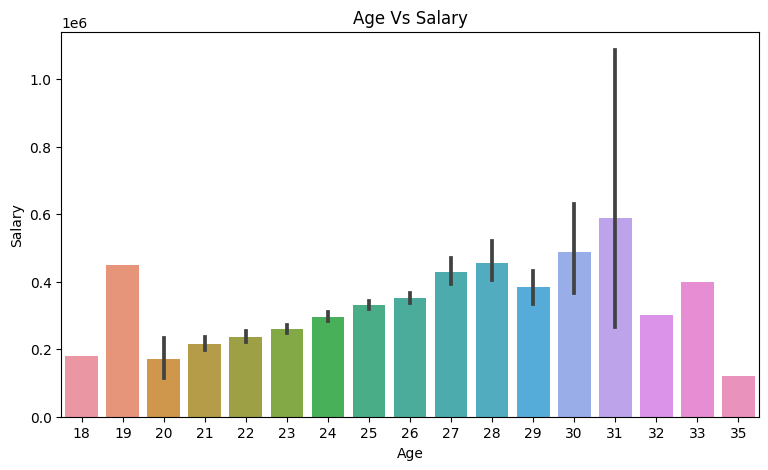

In [33]:
plt.figure(figsize=(9,5))
plt.title('Age Vs Salary')
sns.barplot(x='Age',y='Salary',data=data);

### Observation :

- 31 and 30 had high salaries at that age group

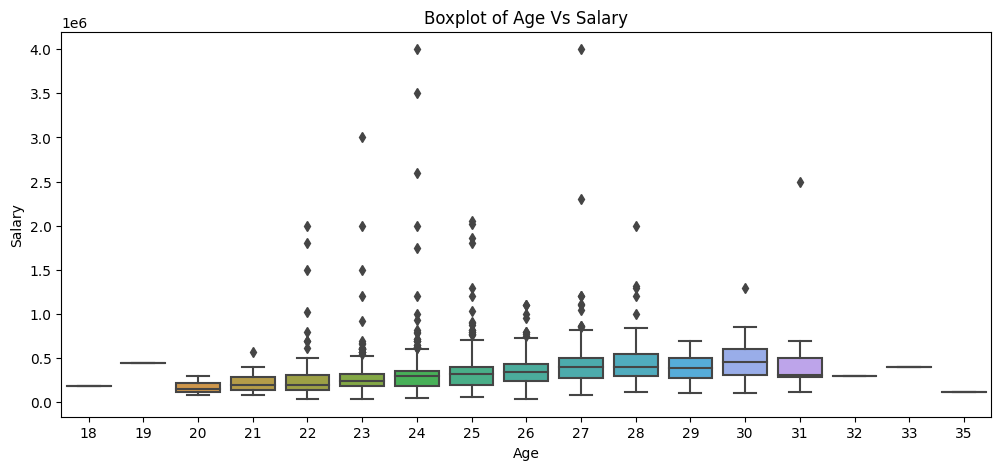

In [34]:
plt.figure(figsize=(12,5))
plt.title('Boxplot of Age Vs Salary')
sns.boxplot(data=data,x='Age', y='Salary');

### Observation :

- 24 and 27 had large number of outlier data which concludes there are high salaries at that age group


### Boxplot of salary data

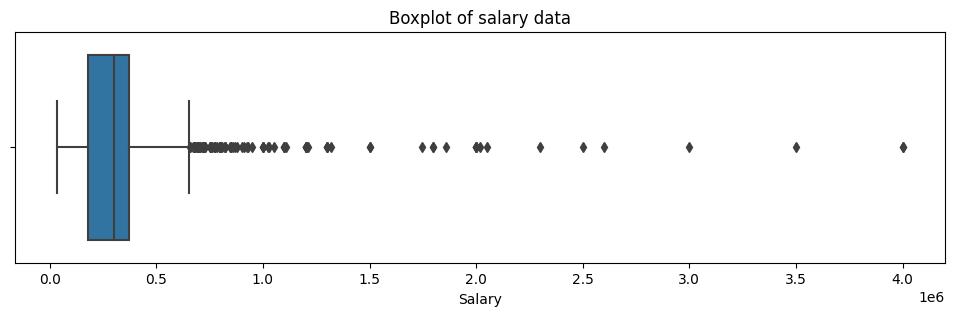

In [35]:
plt.figure(figsize=(12,3))
plt.title('Boxplot of salary data')
sns.boxplot(x = data['Salary']);

### Boxplot visualization of salary and specialization

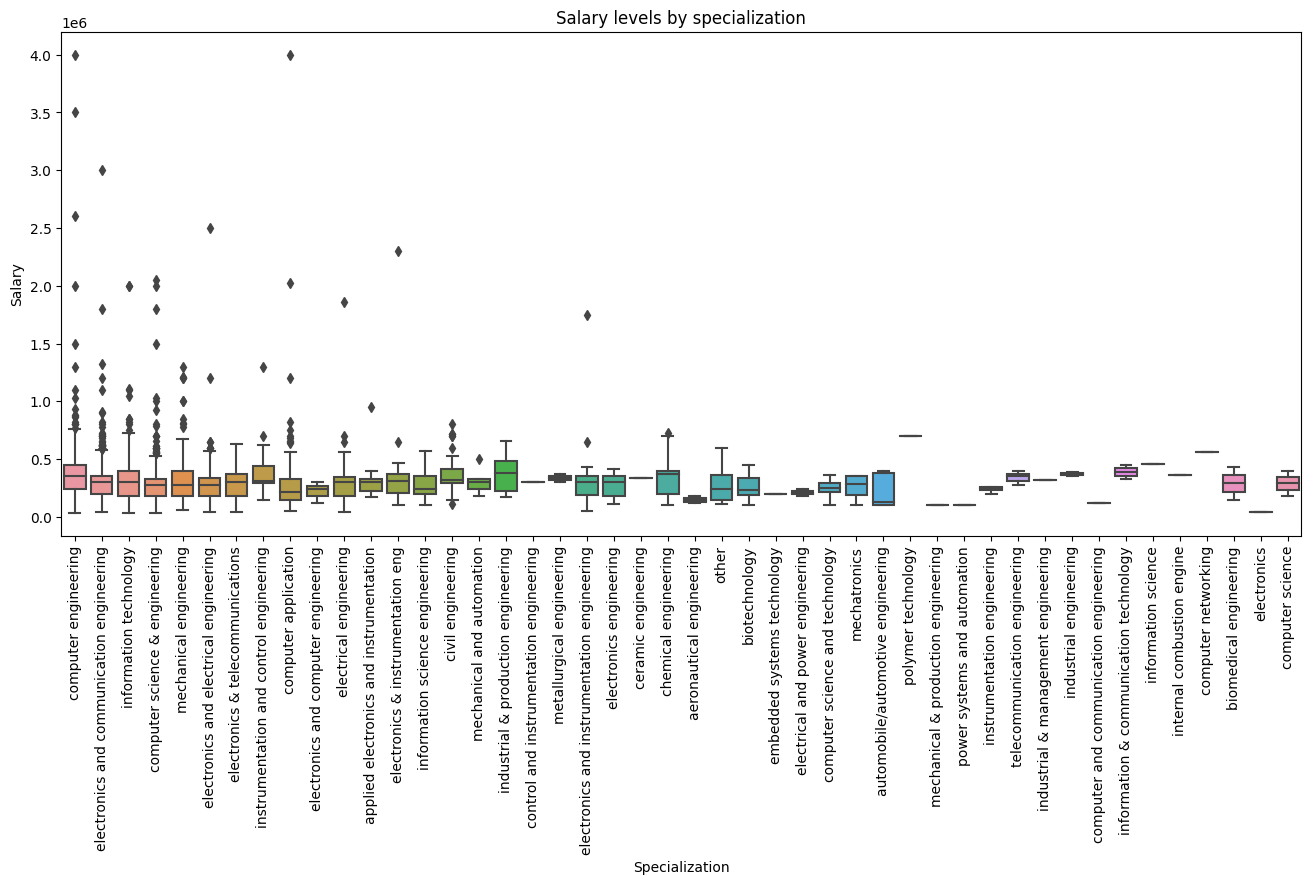

In [36]:
fig, ax = plt.subplots(figsize=(16,6))
sns.boxplot(data=data, x='Specialization', y='Salary')
plt.title('Salary levels by specialization')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig.subplots_adjust(top=0.95)
plt.show()

### Observation :


- If we observe here at each box outliers can be seen for each specialization and considers are highest salary which away from average salary.
- It is observed that Computer Science department has many outliers indicating higher salaries are earned by those of Computer Science specializaton



### Top 20 city names with most of the employees working


In [37]:
data.JobCity.value_counts()[:20]

Bangalore        627
Noida            368
Hyderabad        335
Pune             290
Chennai          272
Gurgaon          198
New Delhi        196
Mumbai           108
Kolkata           98
Jaipur            46
Lucknow           36
Mysore            36
Navi Mumbai       32
chennai           27
pune              26
Greater Noida     26
Chandigarh        26
Indore            24
Bhubaneswar       22
Coimbatore        20
Name: JobCity, dtype: int64

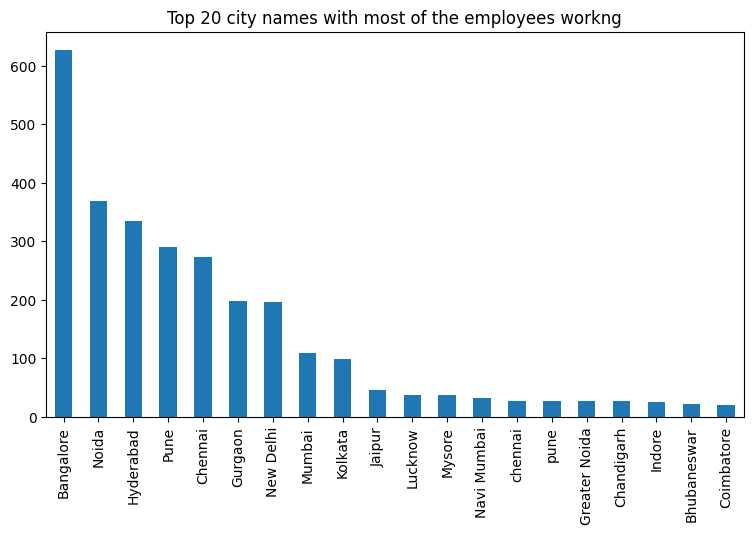

In [38]:
plt.figure(figsize=(9,5))
plt.title('Top 20 city names with most of the employees workng')
data['JobCity'].value_counts()[:20].plot(kind='bar');


### Year Wise Joining

In [39]:
(data['DOJ'].dt.year).value_counts()

2014    1596
2013    1004
2012     590
2011     381
2015     248
2010     166
2009       5
2007       4
2004       1
2008       1
2006       1
1991       1
Name: DOJ, dtype: int64

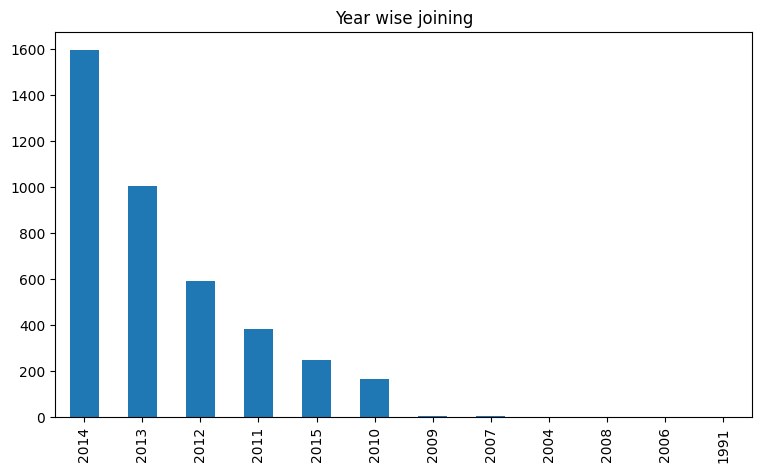

In [40]:
plt.figure(figsize=(9,5))
plt.title('Year wise joining')
(data['DOJ'].dt.year).value_counts().plot(kind='bar');

### Observation :

- In 2014 Highest number of student had Joined companies



### Month wise joining

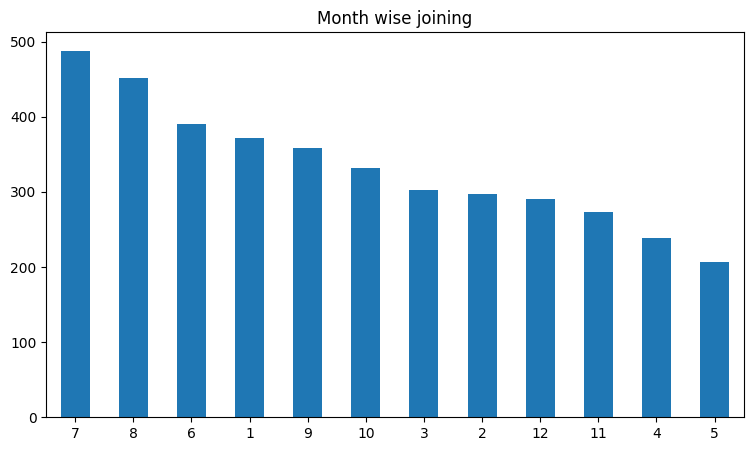

In [41]:
plt.figure(figsize=(9,5))
plt.title('Month wise joining')
data['DOJ'].dt.month.value_counts().plot(kind='bar')
plt.xticks(rotation=0);

### Observation :


- In the 7th month more number of students had got their joining date



### Graduation year

In [42]:
data['GraduationYear'].value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: GraduationYear, dtype: int64

In [43]:
data[data['GraduationYear'] == 0]

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience,Age
2664,325000,2014-07-01,2015-07-01,systems engineer,Chandigarh,m,1991-12-17,89.0,cbse,2010,85.2,cbse,2,B.Tech/B.E.,mechanical engineering,68.76,0,Uttar Pradesh,0,695,655,680,0.755375,-1,-1,-1,446,-1,-1,-1,1.1336,0.3789,-0.2974,-0.3612,-1.244,1,24


#### Note:  This employee 12th passing year is 2010 and he studied 'Engineering' so logically his graduation year will be 2014.

In [44]:
data['GraduationYear'].replace({0:2014}, inplace=True)
data['GraduationYear'].unique()

array([2011, 2012, 2014, 2016, 2013, 2010, 2015, 2009, 2017, 2007],
      dtype=int64)

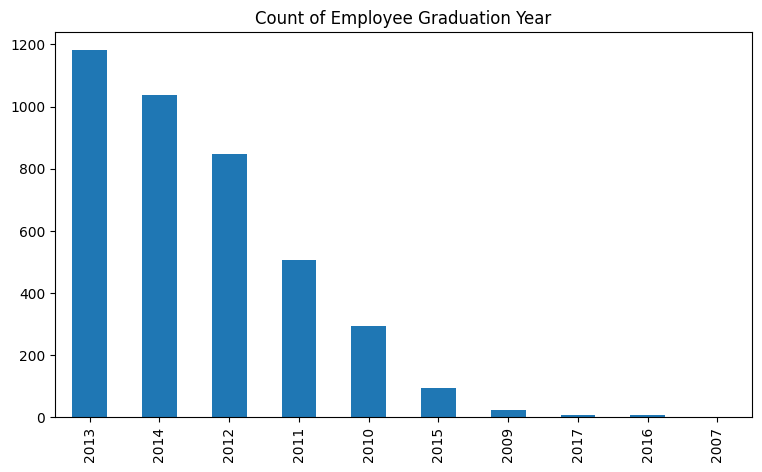

In [45]:
plt.figure(figsize=(9,5))
data['GraduationYear'].value_counts().plot(kind='bar')
plt.title("Count of Employee Graduation Year");

### Observation :


- Highest Number of students are completed their Bachelors Degree in year 2013 and least in 2007



### Bar graph shows year wise from DOB of people

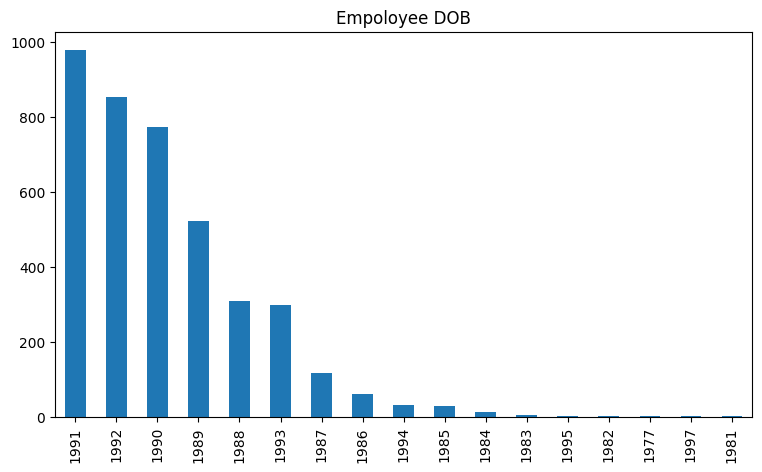

In [46]:
plt.figure(figsize=(9,5))
plt.title('Empoloyee DOB')
(data['DOB'].dt.year).value_counts().plot(kind='bar'); 

### Top 20 Designation

In [47]:
data['Designation'].nunique() # number of unique designations

419

In [48]:
data['Designation'].value_counts()[:20]

software engineer             539
software developer            265
system engineer               205
programmer analyst            139
systems engineer              118
java software engineer        111
software test engineer        100
project engineer               77
technical support engineer     76
senior software engineer       72
java developer                 67
test engineer                  57
web developer                  54
application developer          52
assistant manager              52
network engineer               51
data analyst                   49
business analyst               49
engineer                       47
android developer              46
Name: Designation, dtype: int64

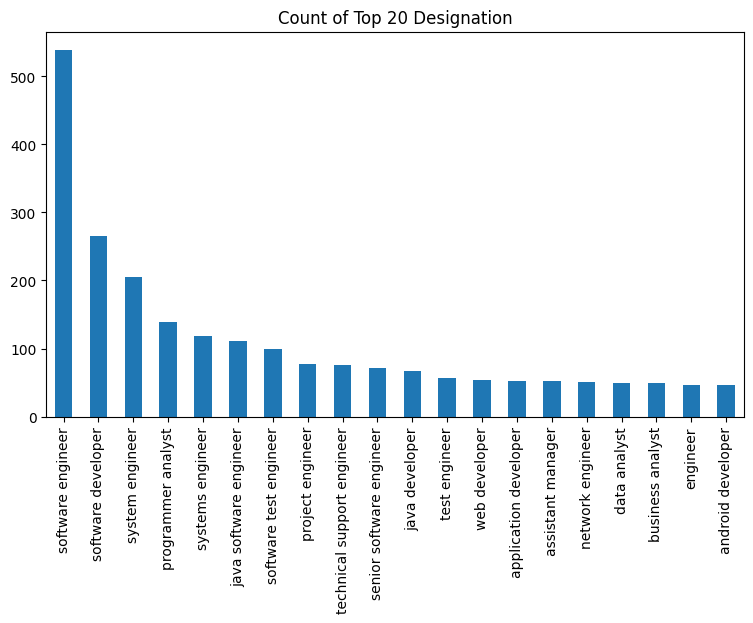

In [49]:
plt.figure(figsize=(9,5))
plt.title("Count of Top 20 Designation")
data['Designation'].value_counts()[:20].plot(kind='bar');

### Employee College States

In [50]:
data['CollegeState'].value_counts()

Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

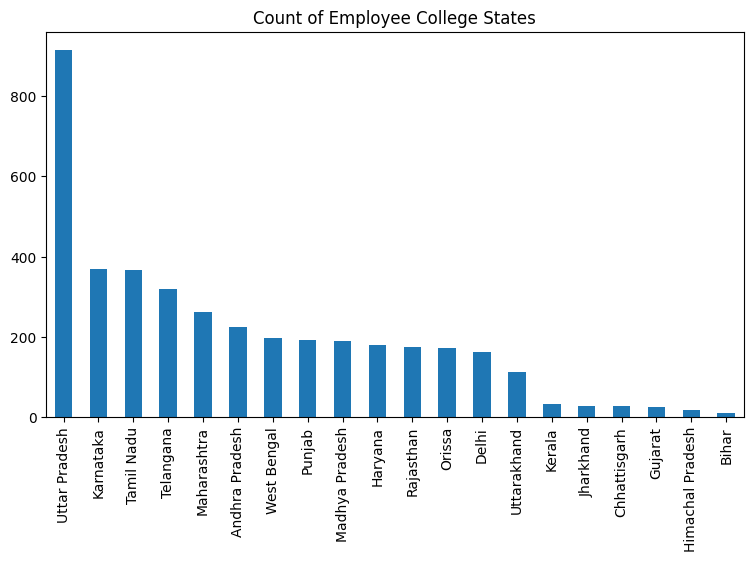

In [51]:
plt.figure(figsize=(9,5))
plt.title("Count of Employee College States")
data['CollegeState'].value_counts()[:20].plot(kind='bar');

### Observation :


- Large number of employee are from Utter Pradesh and followed by Karnataka, Tamilnadu and Telangana

In [52]:
data.groupby("JobCity")['Salary'].max()[:20]

JobCity
 Chennai                  335000
 Delhi                    360000
 Mumbai                   180000
 Pune                     180000
 ariyalur                 570000
 bangalore                560000
 mumbai                   265000
A-64,sec-64,noida         120000
AM                        360000
Agra                      200000
Ahmedabad                 715000
Ahmedabad                 330000
Ahmednagar                335000
Al Jubail,Saudi Arabia    360000
Allahabad                 225000
Alwar                     240000
Ambala                    200000
Ambala City               180000
Asansol                   180000
Asifabadbanglore          200000
Name: Salary, dtype: int64

In [53]:
data['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

### Gender vs Salary

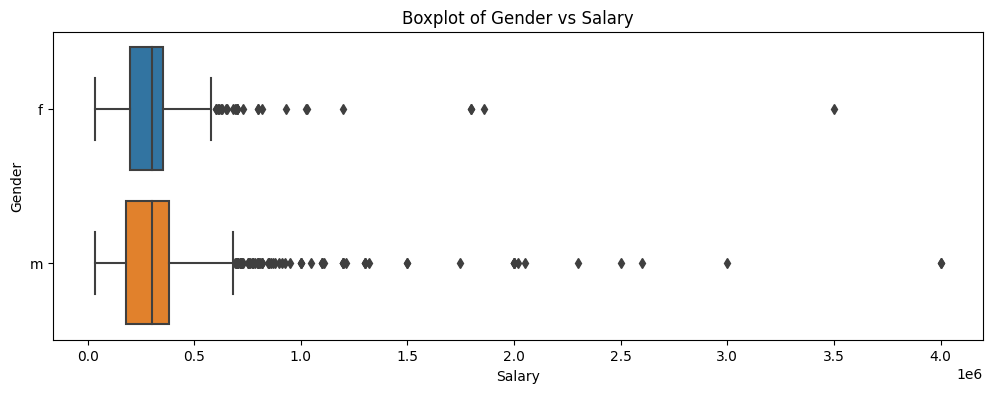

In [54]:
plt.figure(figsize=(12,4))
plt.title("Boxplot of Gender vs Salary")
sns.boxplot(data = data, x = 'Salary', y='Gender' );

### Employee Age


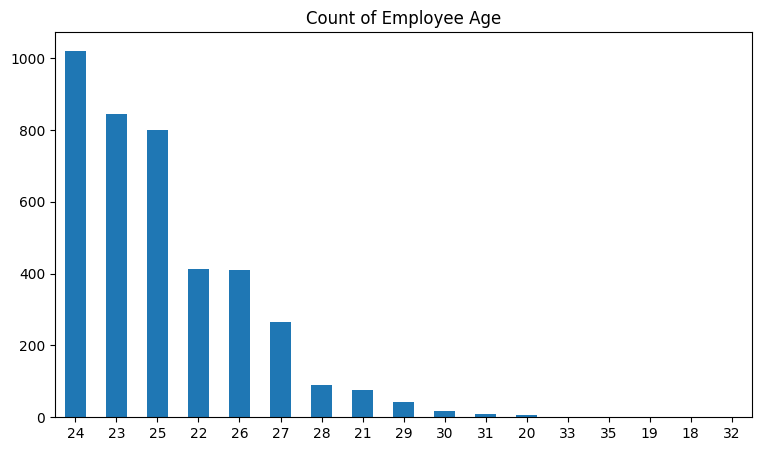

In [55]:
plt.figure(figsize=(9,5))
data['Age'].value_counts().plot(kind='bar')
plt.title("Count of Employee Age")
plt.xticks(rotation=0);

In [56]:
data['Age'].value_counts()

24    1021
23     844
25     800
22     413
26     410
27     266
28      89
21      75
29      42
30      18
31       9
20       6
33       1
35       1
19       1
18       1
32       1
Name: Age, dtype: int64

### Observation :

- Large number of employee age groups are 24, 23 and 25


### Employee Specialization

In [57]:
data['Specialization'].value_counts().head(20)

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

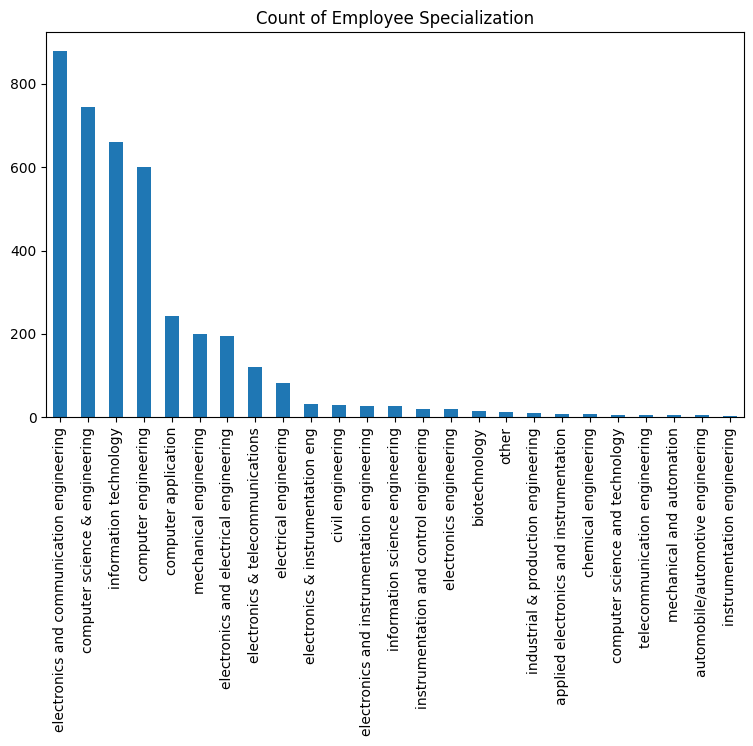

In [58]:
plt.figure(figsize=(9,5))
plt.title("Count of Employee Specialization")
data['Specialization'].value_counts().head(25).plot.bar();

### Observation :

- countplot shows that most of the students from electronics and communication engineering, computer science & engineering, information technology, computer engineering



## Specialization vs Salary

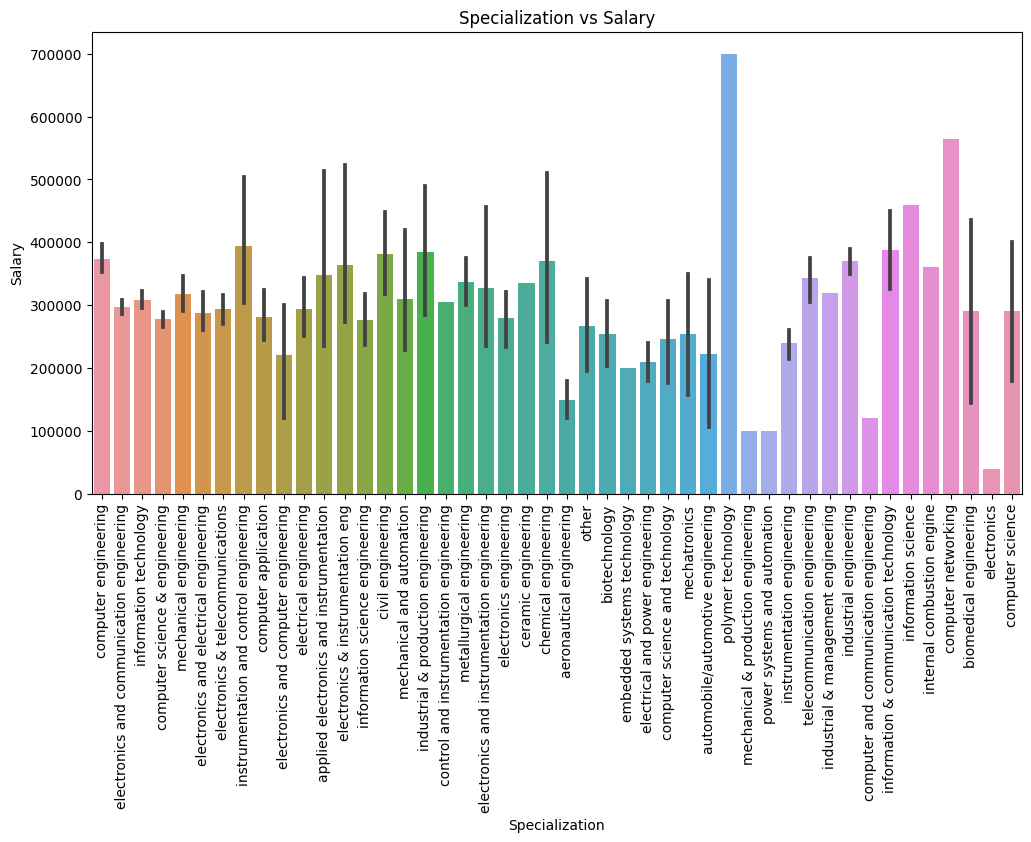

In [59]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title("Specialization vs Salary")
sns.barplot(data=data, x = 'Specialization', y='Salary')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

## 5. Research Question :

- Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

### Claiming that

- Null Hypothesis : H0 : H0 >= 3L
- Alternative Hyo : H1 : H1 < 3 L



### Check the who have the same year of their graduation and job

In [60]:
(data['DOJ'].dt.year == data['GraduationYear']).value_counts()

True     2290
False    1708
dtype: int64

In [61]:
data1 = data[(data.Specialization=='computer science & engineering') & (data['DOJ'].dt.year==data['GraduationYear']) & 
             ((data.Designation=='software engineer')  | (data.Designation=='programmer analyst') | 
              (data.Designation=='associate software engineer'))] 
data1

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience,Age
24,335000,2014-06-01,2015-06-01,programmer analyst,Hyderabad,m,1993-06-28,88.00,state board,2010,90.00,state board,2,B.Tech/B.E.,computer science & engineering,76.00,1,Telangana,2014,625,555,630,0.356536,475,-1,346,-1,-1,-1,-1,0.4155,0.8027,0.1357,-0.99500,-0.6692,1,22
31,340000,2014-08-01,2015-04-01,software engineer,Bangalore,m,1992-10-23,77.20,state board,2010,86.10,state board,2,B.Tech/B.E.,computer science & engineering,71.00,0,Tamil Nadu,2014,560,485,450,0.622643,485,-1,407,-1,-1,-1,-1,-0.0154,1.2114,1.0859,-1.50210,0.2889,1,22
48,390000,2013-09-01,2015-12-31,software engineer,Bangalore,m,1991-02-28,86.60,cbse,2009,75.00,cbse,2,B.Tech/B.E.,computer science & engineering,74.00,0,Madhya Pradesh,2013,505,545,565,0.356536,475,-1,346,-1,-1,-1,-1,-2.5039,0.0328,0.3817,0.26793,0.5024,2,25
55,250000,2014-08-01,2015-12-31,software engineer,Mangalore,m,1992-02-13,90.80,state board,2010,90.10,state board,2,B.Tech/B.E.,computer science & engineering,67.70,0,Karnataka,2014,525,530,595,0.486747,485,-1,376,-1,-1,-1,-1,-0.3027,0.7119,-0.2974,1.16010,-0.4776,1,24
115,330000,2013-12-01,2015-04-01,software engineer,Chennai,m,1992-01-13,76.17,state board,2009,72.00,cbse,2,B.Tech/B.E.,computer science & engineering,78.00,0,Rajasthan,2013,510,535,605,0.819417,505,-1,-1,-1,-1,-1,-1,0.4155,-0.7866,-1.2196,1.16010,-1.8189,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,240000,2014-02-01,2015-12-31,software engineer,Mumbai,f,1991-09-08,73.80,cbse,2008,66.60,cbse,2,B.Tech/B.E.,computer science & engineering,70.41,0,Madhya Pradesh,2014,570,630,545,0.911395,445,-1,500,-1,-1,-1,-1,0.1282,0.5454,0.3174,-0.23440,-0.2859,2,24
3880,300000,2015-06-01,2015-12-31,programmer analyst,Gurgaon,m,1994-06-30,81.00,cbse,2011,80.20,cbse,2,B.Tech/B.E.,computer science & engineering,77.04,0,Punjab,2015,370,590,605,0.991231,555,-1,592,-1,-1,-1,-1,-1.3080,0.2124,1.3933,2.93490,0.4805,1,22
3881,600000,2014-01-01,2015-12-31,software engineer,Bangalore,m,1992-01-31,80.40,jharkhand acedemic council,2009,70.20,jharkhand acedemic council,2,B.Tech/B.E.,computer science & engineering,78.00,0,West Bengal,2014,465,455,680,0.953900,575,-1,530,-1,-1,-1,-1,-0.3027,0.0459,0.3174,-1.12180,-0.0943,2,24
3939,100000,2013-07-01,2014-12-01,software engineer,Hyderabad,m,1992-07-05,65.00,state board,2009,87.90,state board,2,B.Tech/B.E.,computer science & engineering,69.36,0,Andhra Pradesh,2013,405,450,470,0.377551,375,-1,-1,-1,-1,-1,-1,-0.3027,-1.9521,-0.6048,1.16010,-1.8189,1,22


In [62]:
data1[['DOJ','GraduationYear']]

,DOJ,GraduationYear
24,2014-06-01,2014
31,2014-08-01,2014
48,2013-09-01,2013
55,2014-08-01,2014
115,2013-12-01,2013
...,...,...
3818,2014-02-01,2014
3880,2015-06-01,2015
3881,2014-01-01,2014
3939,2013-07-01,2013


### Observation :


- Above all cell is check both graduation year and date of joining in a company should be same which is computer science and engineering who got placed in roles of software engineer, programmer analyst and associate software engineer

In [63]:
data1['Designation'].unique()

array(['programmer analyst', 'software engineer',
       'associate software engineer'], dtype=object)

In [64]:
data1['Specialization'].value_counts()

computer science & engineering    106
Name: Specialization, dtype: int64

In [65]:
data1['Salary']

24      335000
31      340000
48      390000
55      250000
115     330000
         ...  
3818    240000
3880    300000
3881    600000
3939    100000
3989    300000
Name: Salary, Length: 106, dtype: int64

### Salary Description

In [66]:

print('Minimum salary :',data1['Salary'].min())
print('Maximum salary :',data1['Salary'].max())
print('Average salary :',round(data1['Salary'].mean()))
print("Median salary  :",round(data1['Salary'].median()))

Minimum salary : 70000
Maximum salary : 1000000
Average salary : 349198
Median salary  : 320000


### Defining the sample and population parameters

In [67]:
sample_size = 106
sample_mean = 349198
pop_mean = 300000
pop_std = 50000

### z_score for sampling distributions


In [68]:
def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

### Calculating the z-score


In [69]:
z = z_score(sample_size, sample_mean, pop_mean, pop_std)
print(z)

10.130488233525568


### One Tail - Calculating the z-critical value


In [70]:
confidence_level = 0.95
alpha = 1 - confidence_level
z_critical = norm.ppf(1 - alpha)
print(z_critical)

1.6448536269514722


### Ploting the sampling distribution with rejection regions


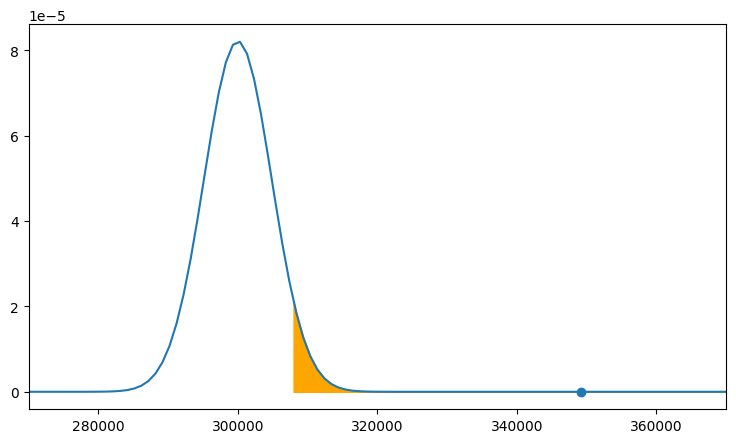

In [71]:
# Defining the x minimum and x maximum
x_min = 270000
x_max = 370000

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / (sample_size**0.5)

# Ploting the graph and setting the x limits
plt.figure(figsize=(9,5))
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the right critical value (Right tailed Test)
z_critical_right = pop_mean + (z_critical * std)

# Shading the right rejection region
x1 = np.linspace(z_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))
plt.show()

### Conclusion using z test


In [72]:
if(z > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


### Conclusion using p test


In [73]:
p_value = 1.0 - norm.cdf(np.abs(z))
print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

    

p_value =  0.0
Reject Null Hypothesis


In [74]:
print('Average salary :',round(data1['Salary'].mean()))
print("Median salary  :",round(data1['Salary'].median()))

Average salary : 349198
Median salary  : 320000


### Observation :

- Here we are getting Reject Null Hypothesis means the salaries for freshers are getting average salaries 3.2L to 3.5L who had joined in computer science engineerning took jobs in softeare enginner, programmer analyst and associate software enginner.
- Based on the above statistics, this claim by times of India is False.
6. Research Question :



### Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)

In [75]:
data['Gender'].unique()

array(['f', 'm'], dtype=object)

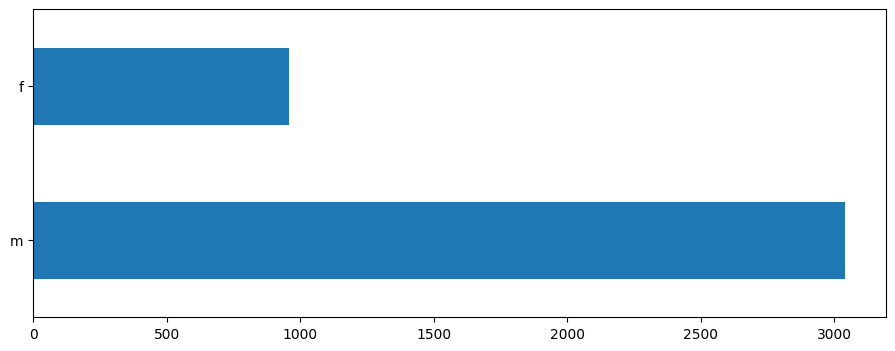

In [76]:
data['Gender'].value_counts().plot(kind='barh', figsize=(11,4))
plt.xticks(rotation=0);

In [77]:
num_males = data['Gender'].where(data['Gender'] == 'm').count()
num_females = data['Gender'].where(data['Gender'] == 'f').count()
print('Number of male candidates   : {}'.format(num_males))
print('Number of female candidates : {}'.format(num_females))
print('Male to Female ratio        : {:.2f}'.format(num_males/num_females))

Number of male candidates   : 3041
Number of female candidates : 957
Male to Female ratio        : 3.18


### Boxplot visualization of salary levels by gender


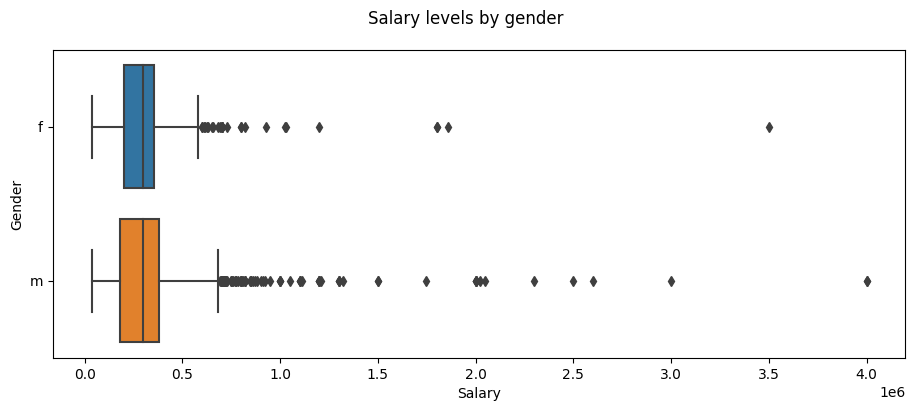

In [78]:
plt.figure(figsize=(11,4))
sns.boxplot(x='Salary', y = 'Gender', data=data)
plt.suptitle('Salary levels by gender')
plt.show()

### Observation :

- Median salary of males is slightly greater than that of females.
- If we observe the outliers in boxplot it clearly shows that male had high range of different salaries.



### Number of male and female regarding with specialization

In [79]:
data.groupby(data['Gender']).count()['Specialization']

Gender
f     957
m    3041
Name: Specialization, dtype: int64

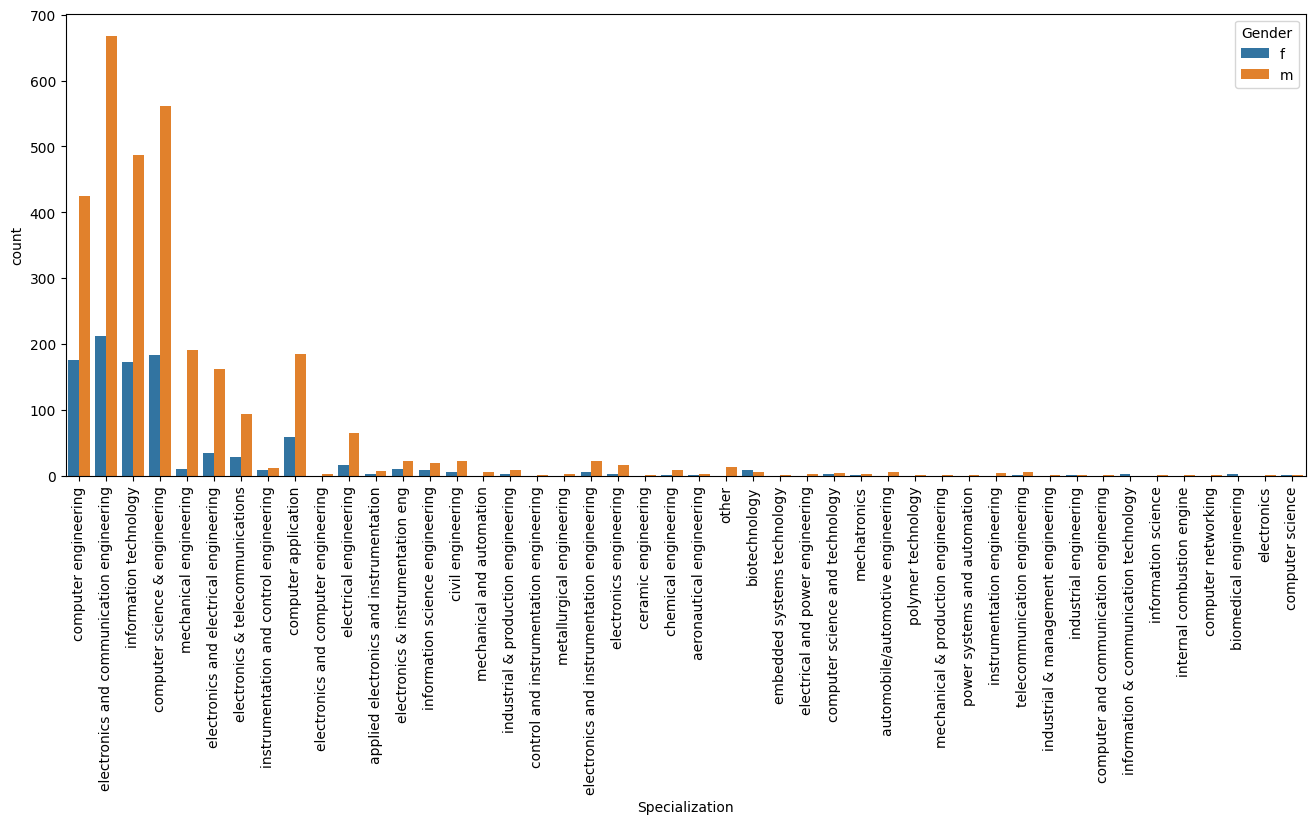

In [80]:
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(data=data, x='Specialization', hue='Gender')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

### Observation :

- We can see that male and female ratio with respect to the specialization column, number of male ratio is higher in every domain. If we observe both male and female are choosing mostly computer science and electronics groups, because pattern trends tells most of the jobs are available in those feilds.


------------------------------------------- END OF TASK -------------------------------------------